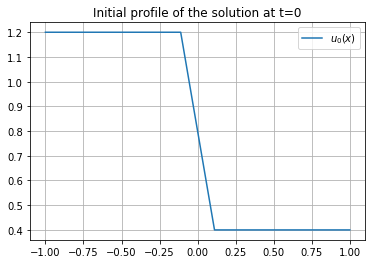

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi


a = -1
b = 1

def u0(x,ul,ur):
    return np.piecewise(x, [x < 0, x >= 0], [lambda x: ul, lambda x: ur])


def uexact(x,t,ul,ur):
    s=(ur+ul)/2
    return np.piecewise(x, [x < s*t, x >= s*t], [lambda x: ul, lambda x: ur])




x=np.linspace(a,b,10)
plt.plot(x,u0(x,1.2,0.4),'-',label='$u_0(x)$')
plt.title('Initial profile of the solution at t=0')
plt.legend()
plt.grid()
plt.show()

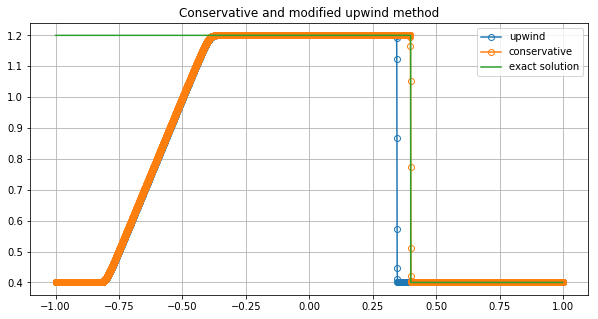

In [2]:
def noncon_upwind(dx,dt,tf,ul,ur):
    nx=int(np.ceil((b-a)/dx))
    x=np.linspace(a,b,nx+1)
    x=x[0:-1] #x_0,...,x_N-1
    u=u0(x,ul,ur) #size N
    t=0
    while (t<tf):
        dt=np.min([dt,tf-dt])
        un=u.copy()
        for i in range(1,nx): #from x_1 to x_N-1
            u[i]=un[i]-(dt/dx)*un[i]*(un[i]-un[i-1])
        u[0]=un[0]-(dt/dx)*un[0]*(un[0]-un[nx-1])
        t=t+dt
    return x,u

def conservative_upwind(dx,dt,tf,ul,ur):
    nx=int(np.ceil((b-a)/dx))
    x=np.linspace(a,b,nx+1) #x_0,...,x_N (N+1 points)
    x=x[0:-1] #x_0,...,x_N-1, #N points
    u=u0(x,ul,ur) #size N
    t=0
    while (t<tf):
        dt=np.min([dt,tf-dt])
        un=u.copy()
        for i in range(1,nx):#from x_1 to x_N-1
            u[i]=un[i]-(dt/dx)*0.5*(un[i]**2-un[i-1]**2)
        u[0]=un[0]-(dt/dx)*0.5*(un[0]**2 - un[nx-1]**2)
        t=t+dt
    return x,u

nx=4000
dx=(b-a)/nx
dt=0.5*dx
tf=.5
ul=1.2
ur=0.4
ShockSpeed=(ul+ur)/2

x, unc=noncon_upwind(dx,dt,tf,ul,ur)
x, ucon=conservative_upwind(dx,dt,tf,ul,ur)

#plots
plt.figure(figsize=(10,5))
plt.plot(x,unc,'-o',markerfacecolor='none',label='upwind')
plt.plot(x,ucon,'-o',markerfacecolor='none',label='conservative')
plt.plot(x,uexact(x,tf,ul,ur),'-',label='exact solution')
plt.legend()
plt.grid()
plt.title('Conservative and modified upwind method')
plt.show()


In [3]:
def shock_speed(u0,unc,ucon,x,ul,ur):
    p1=np.where(abs(unc-ul)<1e-4)[0][-1]
    #print(x[p1])
    p2=np.where(abs(unc-ur)<1e-4)[0][0]
    #print(x[p2])
    xf=(x[p1]+x[p2])/2
    #print(xf)    
    
    speedNC=xf/tf
    
    
    #speedCON=(x[fpos]-x[pos0])/(tf)
    speedCON=2
    p1=np.where(abs(ucon-ul)<1e-4)[0][-1]
    #print(x[p1])
    p2=np.where(abs(ucon-ur)<1e-4)[0][0]
    #print(x[p2])
    xf=(x[p1]+x[p2])/2
    
    speedCON=xf/tf
    
    
    return speedNC, speedCON
########################


def shock_speed(u,x,Tol):
    indexSchock=[]
    for i in range(len(u)-1):
        if (abs(u[i+1]-u[i])) > Tol:
            indexSchock.append(i)
    print(indexSchock)
    if len(indexSchock)<=1: #case with zero speed
        vs=0
    else:
        vs=0.5*(x[indexSchock[0]]+x[indexSchock[-1]])/tf #as final position take midpoint
    
    return vs

Tol=1e-1
vnc=shock_speed(unc,x,Tol)
vcon=shock_speed(ucon,x,Tol)

#vnc,vcon=shock_speed(u0,unc,ucon,x,ul,ur)
print('\n Analytical shock speed:',ShockSpeed)
print('\n Upwind shock speed:',np.round(vnc,3))
print('\n Cons upwind shock speed:',np.round(vcon,3))

[2690, 2691, 2692]
[2798, 2799, 2800]

 Analytical shock speed: 0.8

 Upwind shock speed: 0.691

 Cons upwind shock speed: 0.799


Plots for different values of $h$

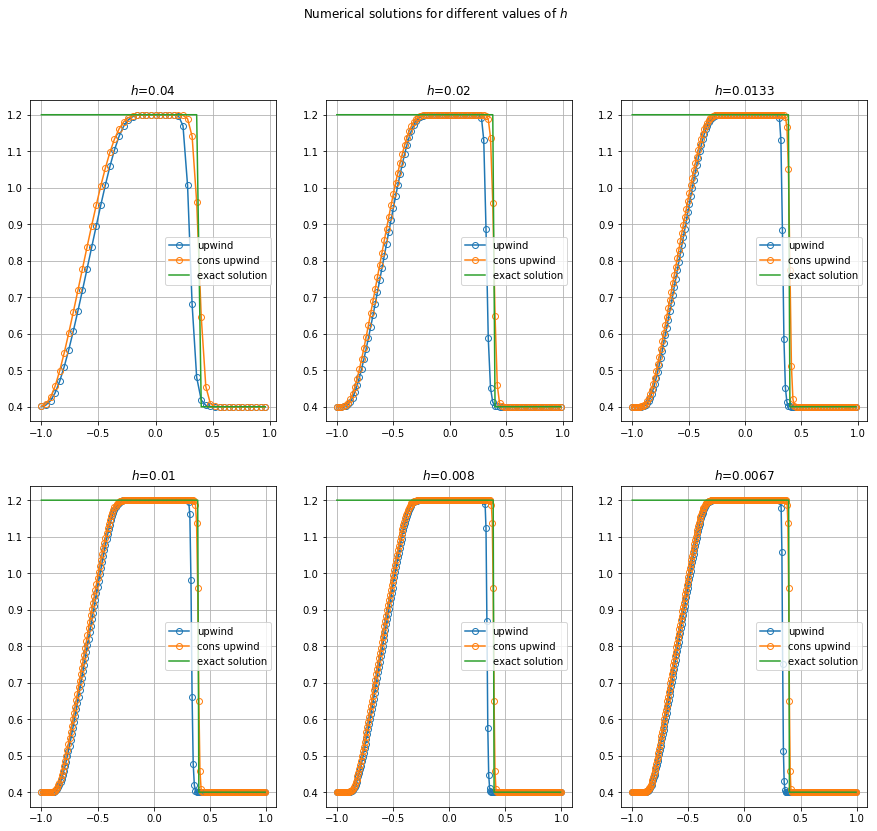

In [7]:
dxrange=2/(np.arange(50,350,50))
plt.figure(figsize=(15,13))
plt.suptitle('Numerical solutions for different values of $h$')
i=1

for dx in dxrange:
    dt=0.5*dx
    tf=0.5
    x, unc=noncon_upwind(dx,dt,tf,ul,ur)
    x, ucon=conservative_upwind(dx,dt,tf,ul,ur)

    plt.subplot(2,3,i)
    plt.plot(x,unc,'-o',markerfacecolor='none',label='upwind')
    plt.plot(x,ucon,'-o',markerfacecolor='none',label='cons upwind')
    plt.plot(x,uexact(x,tf,ul,ur),label='exact solution')
    plt.title('$h$={}'.format(np.round(dx,4)))
    plt.legend()
    plt.grid()
    i=i+1

plt.show()

Computation of shock velocities

In [5]:
hrange=2/(np.arange(600,1200,100))

errNC=[]
errCON=[]
speedsNC=[]
speedsCON=[] 
for dx in hrange:
    dt=0.5*dx
    
    x, unc=noncon_upwind(dx,dt,tf,ul,ur)
    x, ucon=conservative_upwind(dx,dt,tf,ul,ur) #compute solutions
    
    spNC=shock_speed(unc,x,Tol)
    spCON=shock_speed(ucon,x,Tol) #compute shock speeds 
    
    speedsNC.append(spNC) #store numerical shock velocities for each h
    speedsCON.append(spCON)
    
    errNC.append(abs(spNC- ShockSpeed)/abs(ShockSpeed)) #compute relative error
    errCON.append(abs(spCON-ShockSpeed)/abs(ShockSpeed))



[402, 403, 404]
[418, 419, 420]
[469, 470, 471]
[488, 489, 490]
[536, 537, 538]
[558, 559, 560]
[603, 604, 605]
[628, 629, 630]
[670, 671, 672]
[698, 699, 700]
[738, 739, 740]
[768, 769, 770]


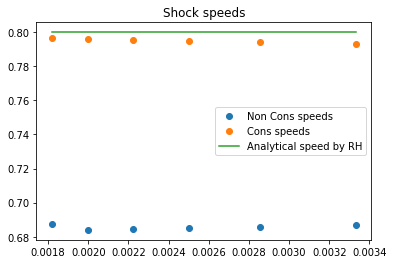

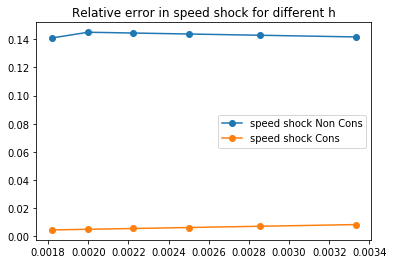

In [6]:
plt.figure()
plt.plot(hrange,speedsNC,'o',label='Non Cons speeds')
plt.plot(hrange,speedsCON,'o',label='Cons speeds')
plt.plot((min(hrange), max(hrange)), (ShockSpeed, ShockSpeed), '-',label='Analytical speed by RH')
plt.legend()
plt.title('Shock speeds')
plt.show()

plt.figure()
plt.plot(hrange,errNC,'-o',label='speed shock Non Cons')
plt.plot(hrange,errCON,'-o',label='speed shock Cons')
plt.legend()
plt.title('Relative error in speed shock for different h')
plt.show()